# Plot forecasting residuals

Analyzing the residuals (errors) of predictions is useful to understand the behavior of a forecaster. The function `skforecast.plot.plot_residuals` creates 3 plots:

+ Residual values in time order

+ Distribution of residuals

+ Residuals autocorrelation

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.plot import plot_residuals

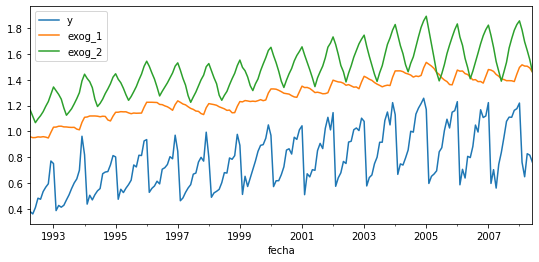

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y/%m/%d')
data = data.set_index('fecha')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()

# Plot data
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax);

In [3]:
# Train and backtest forecaster
# ==============================================================================
n_backtest = 36*3
data_train = data[:-n_backtest]
data_test  = data[-n_backtest:]

forecaster = ForecasterAutoreg(
                regressor = Ridge(),
                lags      = 5 
             )

metric, predictions_backtest = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = data.y,
                                    initial_train_size = len(data_train),
                                    steps              = 36,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                               )

predictions_backtest

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 87
Number of observations used for backtesting: 108
    Number of folds: 3
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   1992-04-01 00:00:00 -- 1999-06-01 00:00:00
    Validation: 1999-07-01 00:00:00 -- 2002-06-01 00:00:00
Data partition in fold: 1
    Training:   1992-04-01 00:00:00 -- 1999-06-01 00:00:00
    Validation: 2002-07-01 00:00:00 -- 2005-06-01 00:00:00
Data partition in fold: 2
    Training:   1992-04-01 00:00:00 -- 1999-06-01 00:00:00
    Validation: 2005-07-01 00:00:00 -- 2008-06-01 00:00:00



,pred
1999-07-01,0.684784
1999-08-01,0.673355
1999-09-01,0.672449
1999-10-01,0.660822
1999-11-01,0.651780
...,...
2008-02-01,0.655673
2008-03-01,0.655675
2008-04-01,0.655675
2008-05-01,0.655674


The function `predictions_backtest` may be use with already calculated residuals or giving the predicted values and the real values of the series.

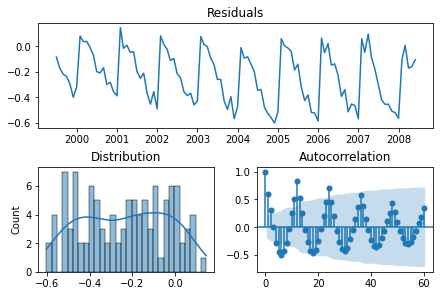

In [4]:
residuals = predictions_backtest['pred'] - data_test['y']
plot_residuals(residuals=residuals)

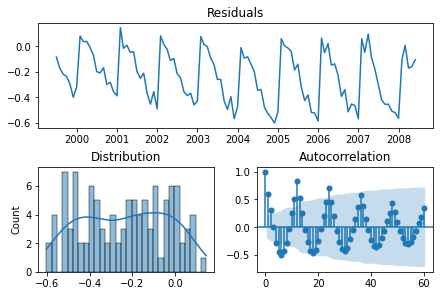

In [5]:
plot_residuals(y_true=data_test['y'], y_pred=predictions_backtest['pred'])

## Customize plot

It is possible to customize the plot by passing an already created matplotlib figure, or using additional keyword arguments that are passed to `matplotlib.pyplot.figure()`.

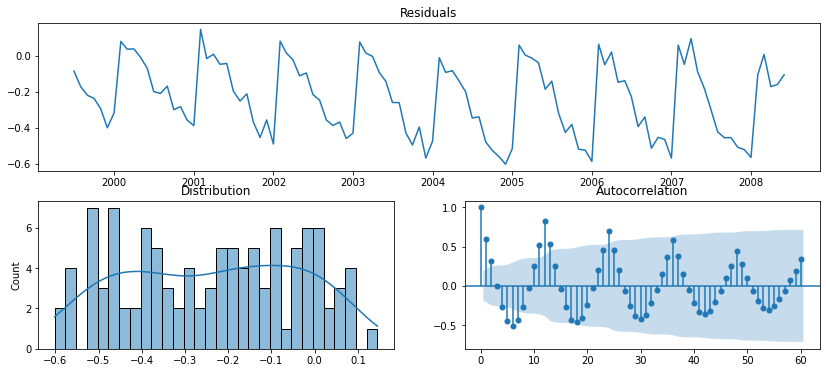

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
plot_residuals(residuals=residuals, fig=fig)

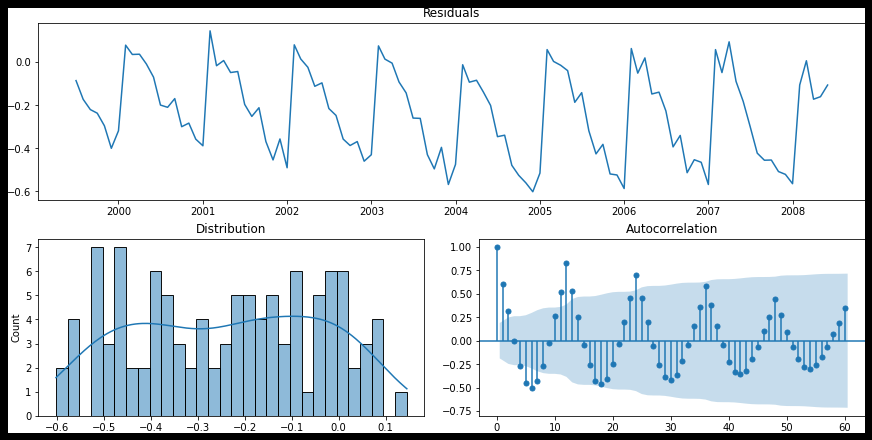

In [7]:
plot_residuals(residuals=residuals, edgecolor="black", linewidth=15, figsize=(12, 6))

It is also possible to custom the internal aesthetics of the plots by changing `plt.rcParams`.

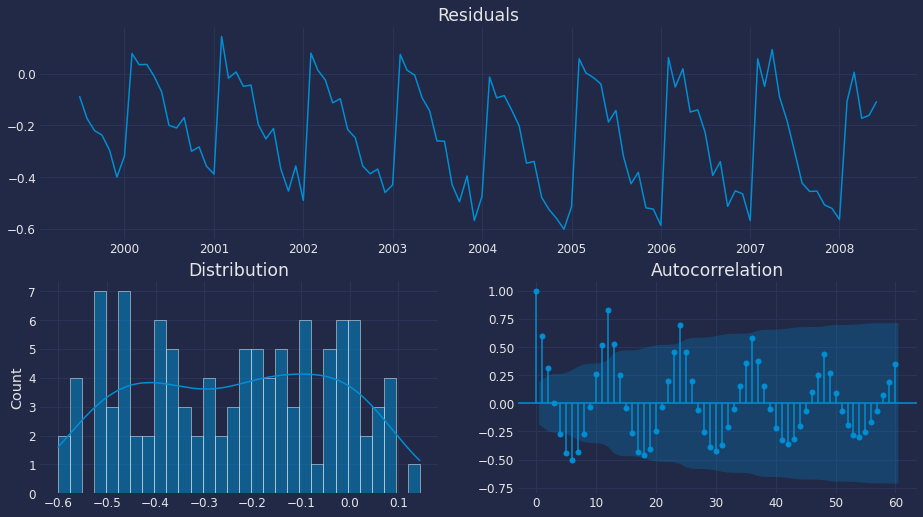

In [8]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12
}
plt.rcParams.update(dark_style)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
plot_residuals(residuals=residuals, fig=fig)

In [9]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>